# Titanic Challenge

In this challenge a machine learning will be used in order to create a models that predict which passengers survived the Titanic shipwreck.

https://www.kaggle.com/competitions/titanic/

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")


#### Loading data

In [252]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.drop(columns=['PassengerId', 'Name'], inplace=True)
test_df.drop(columns=['PassengerId', 'Name'], inplace=True)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [253]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [254]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


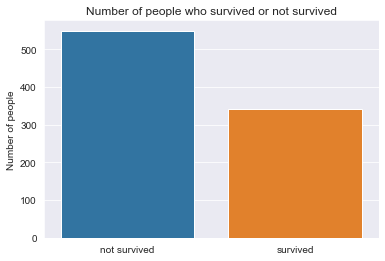

In [255]:
sns.countplot(data=train_df, x='Survived')
plt.ylabel("Number of people")
plt.xticks([1, 0], ["survived", "not survived"])
plt.xlabel("")
plt.title("Number of people who survived or not survived")
plt.show()


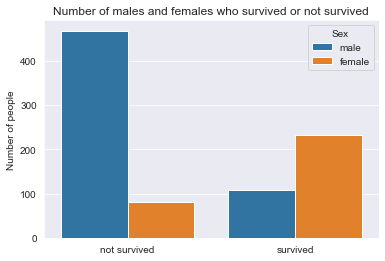

In [256]:
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.ylabel("Number of people")
plt.xticks([1, 0], ["survived", "not survived"])
plt.xlabel("")
plt.title("Number of males and females who survived or not survived")
plt.show()


The most number of deaths were among males. About 100 males and 230 females survived.

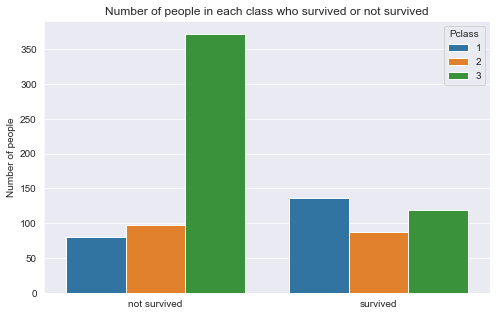

In [257]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.ylabel("Number of people")
plt.xticks([1, 0], ["survived", "not survived"])
plt.xlabel("")
plt.title("Number of people in each class who survived or not survived")
plt.show()


Mostly people in 3rd class cabins not survived (over 350 people).

In [258]:
train_df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Handling Missig Values

In [259]:
train_percent_missing = (train_df.isnull().sum().sum() /
                         np.product(train_df.shape)) * 100
test_percent_missing = (test_df.isnull().sum().sum() /
                        np.product(test_df.shape)) * 100

print("Train dataset missing values:")
print(train_df.isnull().sum())
print("\nTest dataset missing values:")
print(test_df.isnull().sum())

print(
    f"\nThere are {train_percent_missing:.2f}% missing values in train dataset")
print(f"There are {test_percent_missing:.2f}% missing values in train dataset")


Train dataset missing values:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Test dataset missing values:
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

There are 9.72% missing values in train dataset
There are 11.00% missing values in train dataset


Null values handling strategy:
- Age - median
- Cabin - filling with "missig" value
- Embarked - most common value
- Fare - median

In [260]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Cabin'].fillna("missing", inplace=True)
    df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    return df


In [261]:
train_df = fill_missing_values(train_df)
test_df = fill_missing_values(test_df)


#### One Hot Encoding Categorical Variables

In [262]:
from sklearn.preprocessing import OneHotEncoder


In [263]:
categorical_columns = [
    col for col in train_df.columns if train_df[col].dtype == "object"]
print(f"Categorical columns: {categorical_columns}")


Categorical columns: ['Sex', 'Ticket', 'Cabin', 'Embarked']


In [264]:
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

OH_train = pd.DataFrame(OH_encoder.fit_transform(
    train_df[categorical_columns]))
OH_test = pd.DataFrame(OH_encoder.transform(test_df[categorical_columns]))

# Removing categorical columns from datasets
train_df = train_df.drop(columns=categorical_columns)
test_df = test_df.drop(columns=categorical_columns)

# Adding one-hot encoded columns to datasets
train_df = pd.concat([train_df, OH_train], axis=1)
test_df = pd.concat([test_df, OH_test], axis=1)


In [265]:
train_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,...,824,825,826,827,828,829,830,831,832,833
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Scaling Datasets

In [266]:
from sklearn.preprocessing import StandardScaler


In [267]:
y_train = train_df.pop('Survived').values
X_train = train_df.values
X_test = test_df.values


In [268]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Creating Models

In [269]:
from sklearn.model_selection import cross_validate


In [270]:
def get_metrics(model, X_train: np.array, y_train: np.array) -> dict:
    cv_results = cross_validate(model,
                                X_train,
                                y_train,
                                cv=5,
                                scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

    metrics = {'accuracy': [cv_results['test_accuracy'].mean()],
               'precision': [cv_results['test_precision'].mean()],
               'recall': [cv_results['test_recall'].mean()],
               'f1': [cv_results['test_f1'].mean()],
               'roc_auc': [cv_results['test_roc_auc'].mean()],
               'model': [str(model).split("(")[0]]}

    return metrics


#### Logistic Regression


In [271]:
from sklearn.linear_model import LogisticRegression


In [272]:
log_reg_met = get_metrics(LogisticRegression(), X_train, y_train)


In [273]:
metrics_df = pd.DataFrame(data=log_reg_met)

metrics_df


,accuracy,precision,recall,f1,roc_auc,model
0,0.836143,0.825667,0.728005,0.77323,0.880174,LogisticRegression


#### K-Nearest Neighbors

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [275]:
params = {'n_neighbors': list(range(1, 20))}

grid_knn = GridSearchCV(KNeighborsClassifier(),
                        params,
                        cv=5,
                        n_jobs=-1)


grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [276]:
print(f"Best parameters: {grid_knn.best_params_}")


Best parameters: {'n_neighbors': 11}


In [277]:
knn_met = get_metrics(grid_knn.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(knn_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "KNeighborsClassifier"]


,accuracy,precision,recall,f1,roc_auc,model
1,0.635265,0.669048,0.079199,0.123258,0.627826,KNeighborsClassifier


#### Support Vector Machines

In [278]:
from sklearn.svm import SVC


In [279]:
params = {'kernel': ["linear", "poly", "rbf", "sigmoid"],
          'C': [0.1, 0.4, 0.75, 1, 2, 4],
          'degree': [3, 4, 5]}

grid_svc = GridSearchCV(SVC(),
                        params,
                        cv=5,
                        n_jobs=-1)


grid_svc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.4, 0.75, 1, 2, 4], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [280]:
print(f"Best parameters: {grid_svc.best_params_}")


Best parameters: {'C': 0.1, 'degree': 3, 'kernel': 'linear'}


In [281]:
svc_met = get_metrics(grid_svc.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(svc_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "SVC"]


,accuracy,precision,recall,f1,roc_auc,model
2,0.828266,0.808571,0.724936,0.762984,0.877811,SVC


#### Decision Tree Classifier

In [282]:
from sklearn.tree import DecisionTreeClassifier


In [283]:
params = {'max_depth': [5, 10, 25, 50, 100],
          'min_samples_split': [2, 4, 7, 12],
          'min_samples_leaf': [1, 2, 4, 7, 11]}

grid_tree = GridSearchCV(DecisionTreeClassifier(),
                         params,
                         cv=5,
                         n_jobs=-1)


grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 7, 11],
                         'min_samples_split': [2, 4, 7, 12]})

In [284]:
print(f"Best parameters: {grid_tree.best_params_}")


Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 7}


In [285]:
tree_met = get_metrics(grid_tree.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(tree_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "DecisionTreeClassifier"]


,accuracy,precision,recall,f1,roc_auc,model
3,0.829439,0.808488,0.730861,0.766638,0.822779,DecisionTreeClassifier


#### Random Forest Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier


In [287]:
params = {'n_estimators': [50, 100, 200, 500, 750]}

grid_forest = GridSearchCV(RandomForestClassifier(),
                           params,
                           cv=5,
                           n_jobs=-1)

grid_forest.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200, 500, 750]})

In [288]:
print(f"Best parameters: {grid_forest.best_params_}")


Best parameters: {'n_estimators': 500}


In [289]:
forest_met = get_metrics(grid_forest.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(forest_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "RandomForestClassifier"]


,accuracy,precision,recall,f1,roc_auc,model
4,0.833896,0.846842,0.692796,0.76,0.877544,RandomForestClassifier


#### Naive Bayes

In [290]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


In [291]:
mm_scaler = MinMaxScaler()
X_train_bayes = mm_scaler.fit_transform(X_train)


In [292]:
params = {'alpha': [0.1, 0.3, 0.6, 1, 1.2, 1.5, 2]}

grid_bayes = GridSearchCV(MultinomialNB(),
                          params,
                          cv=5,
                          n_jobs=-1)

grid_bayes.fit(X_train_bayes, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.6, 1, 1.2, 1.5, 2]})

In [293]:
print(f"Best parameters: {grid_bayes.best_params_}")


Best parameters: {'alpha': 0.3}


In [294]:
bayes_met = get_metrics(grid_bayes.best_estimator_, X_train_bayes, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(bayes_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "MultinomialNB"]


,accuracy,precision,recall,f1,roc_auc,model
5,0.809183,0.770341,0.719096,0.743318,0.85949,MultinomialNB


#### Linear Discriminant Analysis

In [295]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [296]:
params = {'solver': ["svd", "lsqr", "eigen"]}

grid_lda = GridSearchCV(LinearDiscriminantAnalysis(),
                        params,
                        cv=5,
                        n_jobs=-1)

grid_lda.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [297]:
print(f"Best parameters: {grid_lda.best_params_}")


Best parameters: {'solver': 'svd'}


In [298]:
lda_met = get_metrics(grid_lda.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(lda_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "LinearDiscriminantAnalysis"]


,accuracy,precision,recall,f1,roc_auc,model
6,0.654309,0.702081,0.433632,0.471868,0.560979,LinearDiscriminantAnalysis


#### AdaBoost Clasifier

In [299]:
from sklearn.ensemble import AdaBoostClassifier


In [300]:
params = {'n_estimators': [100, 150, 200],
          'learning_rate': [1, 1.5, 2]}

grid_ada = GridSearchCV(AdaBoostClassifier(),
                        params,
                        cv=5,
                        n_jobs=-1)

grid_ada.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 1.5, 2],
                         'n_estimators': [100, 150, 200]})

In [301]:
print(f"Best parameters: {grid_ada.best_params_}")


Best parameters: {'learning_rate': 1.5, 'n_estimators': 150}


In [302]:
ada_met = get_metrics(grid_ada.best_estimator_, X_train, y_train)

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(ada_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "AdaBoostClassifier"]


,accuracy,precision,recall,f1,roc_auc,model
7,0.833921,0.806944,0.745652,0.774892,0.870898,AdaBoostClassifier


In [303]:
from xgboost import XGBClassifier


In [304]:
params = {'n_estimators': [25, 50, 100, 200],
          'learning_rate': [0.01, 0.05, 0.1, 0.5]}

grid_xgb = GridSearchCV(XGBClassifier(),
                        params,
                        cv=5,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [25, 50, 100, 200]})

In [305]:
print(f"Best parameters: {grid_xgb.best_params_}")


Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [306]:
xgb_met = get_metrics(grid_xgb.best_estimator_, X_train, y_train)
xgb_met

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(xgb_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "XGBClassifier"]


,accuracy,precision,recall,f1,roc_auc,model
8,0.838403,0.836636,0.722123,0.77316,0.867074,XGBClassifier


#### Neural Network

In [307]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold


In [308]:
X_train.shape[1]


839

In [309]:
def create_model() -> keras.Model:
    model = keras.models.Sequential()
    model.add(layers.Dense(8, input_shape=(
        X_train.shape[1],), activation="relu", kernel_regularizer='l2'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16, activation="relu", kernel_regularizer='l2'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="sigmoid"))

    loss = keras.losses.BinaryCrossentropy()
    optim = keras.optimizers.Adam(learning_rate=0.01)
    metrics = [keras.metrics.BinaryAccuracy(),
               keras.metrics.Precision(),
               keras.metrics.Recall(),
               keras.metrics.AUC()]

    model.compile(loss=loss, optimizer=optim, metrics=metrics)

    return model


In [310]:
def get_f1_score(precision: float, recall: float) -> float:
    return 2 * precision * recall / (precision + recall)


In [311]:
# del model
# keras.backend.clear_session()

accuracy = []
precision = []
recall = []
auc = []
f1_score = []

# cross-validation
for train_idx, test_idx in KFold(5).split(X_train):
    X_train_k, X_test_k = X_train[train_idx], X_train[test_idx]
    y_train_k, y_test_k = y_train[train_idx], y_train[test_idx]

    model = create_model()
    model.fit(X_train_k, y_train_k, epochs=50, verbose=0)

    print("\nModel evaluation")
    eval_results = model.evaluate(X_test_k, y_test_k)

    accuracy.append(eval_results[1])
    precision.append(eval_results[2])
    recall.append(eval_results[3])
    auc.append(eval_results[4])
    f1_score.append(get_f1_score(eval_results[2], eval_results[3]))



Model evaluation
6/6 [==============================] - 1s 3ms/step - loss: 0.8357 - binary_accuracy: 0.8268 - precision_5: 0.7188 - recall_5: 0.7797 - auc_5: 0.8549

Model evaluation
6/6 [==============================] - 1s 3ms/step - loss: 1.2775 - binary_accuracy: 0.7921 - precision_6: 0.8182 - recall_6: 0.6835 - auc_6: 0.8321

Model evaluation
6/6 [==============================] - 1s 3ms/step - loss: 0.7476 - binary_accuracy: 0.8202 - precision_7: 0.7681 - recall_7: 0.7681 - auc_7: 0.8826

Model evaluation
6/6 [==============================] - 1s 3ms/step - loss: 0.9804 - binary_accuracy: 0.7921 - precision_8: 0.8302 - recall_8: 0.6111 - auc_8: 0.8076

Model evaluation
6/6 [==============================] - 1s 3ms/step - loss: 0.7594 - binary_accuracy: 0.8596 - precision_9: 0.8519 - recall_9: 0.7302 - auc_9: 0.8752


In [312]:
nn_met = {'accuracy': [np.mean(accuracy)],
          'precision': [np.mean(precision)],
          'recall': [np.mean(recall)],
          'f1': [np.mean(f1_score)],
          'roc_auc': [np.mean(auc)],
          'model': ["NeuralNetwork"]}

metrics_df = pd.concat(
    [metrics_df, pd.DataFrame(nn_met)]).reset_index(drop=True)
metrics_df[metrics_df['model'] == "NeuralNetwork"]


,accuracy,precision,recall,f1,roc_auc,model
9,0.818172,0.797418,0.714518,0.750247,0.850481,NeuralNetwork


In [313]:
metrics_df


,accuracy,precision,recall,f1,roc_auc,model
0,0.836143,0.825667,0.728005,0.773230,0.880174,LogisticRegression
1,0.635265,0.669048,0.079199,0.123258,0.627826,KNeighborsClassifier
2,0.828266,0.808571,0.724936,0.762984,0.877811,SVC
3,0.829439,0.808488,0.730861,0.766638,0.822779,DecisionTreeClassifier
4,0.833896,0.846842,0.692796,0.760000,0.877544,RandomForestClassifier
5,0.809183,0.770341,0.719096,0.743318,0.859490,MultinomialNB
6,0.654309,0.702081,0.433632,0.471868,0.560979,LinearDiscriminantAnalysis
7,0.833921,0.806944,0.745652,0.774892,0.870898,AdaBoostClassifier
8,0.838403,0.836636,0.722123,0.773160,0.867074,XGBClassifier
9,0.818172,0.797418,0.714518,0.750247,0.850481,NeuralNetwork


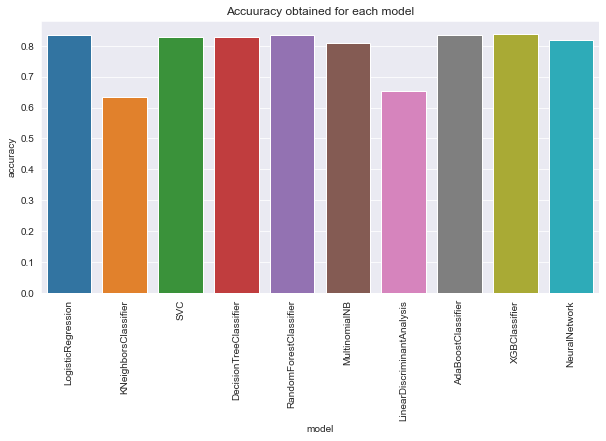

In [314]:
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, y='accuracy', x='model')
plt.xticks(rotation=90)
plt.title("Accuuracy obtained for each model")
plt.show()


## Conclusions

- The best possible result in terms of accuracy is around 83%. Accuracy a little bit greater than this score was obtained using following models:
    - Logistic Regression
    - Random Forest Classifier
    - AdaBoost Classifier
    - XGBoost Classifier
- K-nearest Neighbors Classifier and Linear Dicriminant Analysis Classifier did the worst.
- In order to get metrics shown above, cross-validation technique was used.